### Lab-05: Logistic regression

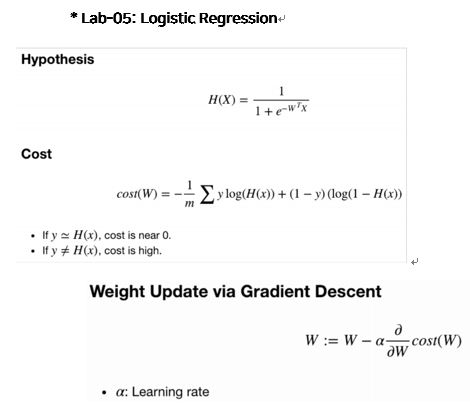

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # 같은 결과를 재현하기 위해

In [ ]:
# Training Data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
# Computing the Hypothesis
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
torch.Size([6, 1])


In [ ]:
# Computing the Cost Function
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)) # BCE

print(losses)

cost = losses.mean()
print(cost)

# 위의 수식을 한번에! -> 이진 분류이므로 BCE
F.binary_cross_entropy(hypothesis, y_train)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
tensor(0.6931, grad_fn=<MeanBackward0>)


tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [ ]:
## Whole Training Procedure

# 모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # cost 계산
  hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
# Evaluation -> test data 직접 만들어서 실행해보자!
hypothesis = torch.sigmoid(x_test.matmul(W) + b)
print(hypothesis[:5])

prediction = hypothesis >= torch.FloatTensor([0.5]) # prediction -> byteTensor형
print(prediction[:5])

print(prediction[:5])
print(y_train[:5])

correct_prediction = prediction.float() == y_train
print(correct_prediction[:5])

In [ ]:
## Higher Implementation with Class

class BinaryClassifier(nn.Module): # nn.Module 이라는 추상 클래스를 상속!
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1) # d = 2
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

model = BinaryClassifier()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(x_train)

  # cost 계산
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 10번마다 로그 출력
  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
        epoch, nb_epochs, cost.item(), accuracy * 100,
    ))

Epoch    0/100 Cost: 0.733120 Accuracy 50.00%
Epoch   10/100 Cost: 0.471225 Accuracy 83.33%
Epoch   20/100 Cost: 0.739847 Accuracy 66.67%
Epoch   30/100 Cost: 0.542283 Accuracy 83.33%
Epoch   40/100 Cost: 0.451816 Accuracy 83.33%
Epoch   50/100 Cost: 0.367630 Accuracy 83.33%
Epoch   60/100 Cost: 0.288506 Accuracy 83.33%
Epoch   70/100 Cost: 0.220184 Accuracy 83.33%
Epoch   80/100 Cost: 0.173718 Accuracy 100.00%
Epoch   90/100 Cost: 0.151886 Accuracy 100.00%
Epoch  100/100 Cost: 0.140431 Accuracy 100.00%
